In [40]:
import pandas as pd

data = {'Werte': [10, 20, 30, 40, 40, 50]}
df = pd.DataFrame(data)

df['Rang_first'] = df['Werte'].rank(method='first', ascending=True)
df['Rang_min'] = df['Werte'].rank(method='min', ascending=True)
df['Rang_max'] = df['Werte'].rank(method='max', ascending=True)
df['Rang_avg'] = df['Werte'].rank(method='average', ascending=True)
df['Rang_dense'] = df['Werte'].rank(method='dense', ascending=True)
display(df)

,Werte,Rang_first,Rang_min,Rang_max,Rang_avg,Rang_dense
0,10,1.0,1.0,1.0,1.0,1.0
1,20,2.0,2.0,2.0,2.0,2.0
2,30,3.0,3.0,3.0,3.0,3.0
3,40,4.0,4.0,5.0,4.5,4.0
4,40,5.0,4.0,5.0,4.5,4.0
5,50,6.0,6.0,6.0,6.0,5.0


# Je nach eingetrager Methode werden die gespeicherten Ränge überschrieben. z.b. bei average:
    # 'first': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'average': [(1, 0, 1), (2, 4, 2), (3.5, 1, 3), (3.5, 3, 3), (5, 2, 5)]
    # 'min': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (5, 2, 5)]
    # 'max': [(1, 0, 1), (2, 4, 2), (4, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'dense': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (4, 2, 5)]

In [41]:
import pandas as pd
from numpy import mean

# D A V E W A V E is here
# marc 4 president🦫 BOBR!
# marc 4 president🦫 BOBR!
# marc 4 president🦫 BOBR!
def avg(arg):
    return sum(arg)/len(arg)

def sort_by_og_order_and_return_only_first(liste):
    return [x[0] for x in sorted(liste, key=lambda x:x[1])]

def my_rank(values, method='average', ascending=True):
    
    # index merken [1,3,5,3,2] -> [(0, 1), (1, 3), (2, 5), (3, 3), (4, 2)]
    indices_values = list(enumerate(values))
    
    # sortieren der liste nach dem zweiten eintrag: [(0, 1), (4, 2), (1, 3), (3, 3), (2, 5)]
    sorted_indices_values = sorted(indices_values, key=lambda x: x[1])
    
    # Rang hinzufügen nach der Methode first: [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    # (rang, ursprünglichen index, zahl selbst)
    ranks_indices_values = [(rank, index, number) for rank, (index, number) 
                            in enumerate(sorted_indices_values, start=1)]

    # Je nach eingetrager Methode werden die gespeicherten Ränge überschrieben. z.b. bei average:
    # 'first': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'average': [(1, 0, 1), (2, 4, 2), (3.5, 1, 3), (3.5, 3, 3), (5, 2, 5)]
    # 'min': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (5, 2, 5)]
    # 'max': [(1, 0, 1), (2, 4, 2), (4, 1, 3), (4, 3, 3), (5, 2, 5)]
    # 'dense': [(1, 0, 1), (2, 4, 2), (3, 1, 3), (3, 3, 3), (4, 2, 5)]
   
    # ranks_indices_values = [(1, 0, 1), (2, 4, 2), (3, 1, 3), (4, 3, 3), (5, 2, 5)]
    result = []
    for rank, index, number in ranks_indices_values:

        ranks_with_same_numbers_as_number = []
        for rank_sec, index_sec, number_sec in ranks_indices_values:
            if number == number_sec:
                ranks_with_same_numbers_as_number.append(rank_sec)

        if method == 'max':
            new_rank = max(ranks_with_same_numbers_as_number)
        elif method == 'min':
            new_rank = min(ranks_with_same_numbers_as_number)
        elif method == 'average':
            new_rank = avg(ranks_with_same_numbers_as_number)
        elif method == 'first':
            new_rank = rank

        result.append((new_rank, index, number))

    # Erstelle eine Liste der Ränge sortiert nach dem ursprünglichen Index
    # result = [1, 3.5, 5, 3.5, 2]
    return sort_by_og_order_and_return_only_first(result)


In [42]:
data = {"Marke": ["VW", "Audi", "Mercedes"],
        "Antrieb": ["Allrad", "Vorderrad", "hinterrad"]}

df = pd.DataFrame(data)
df

,Marke,Antrieb
0,VW,Allrad
1,Audi,Vorderrad
2,Mercedes,hinterrad


In [43]:
series = pd.Series([1,2,1,3,2,4])
print(series.value_counts())

1    2
2    2
3    1
4    1
Name: count, dtype: int64


# Sortiertes Wertediagramm

Wert
0    1
1    1
2    2
3    2
4    2
5    3
Name: count, dtype: int64

<Axes: xlabel='Wert'>

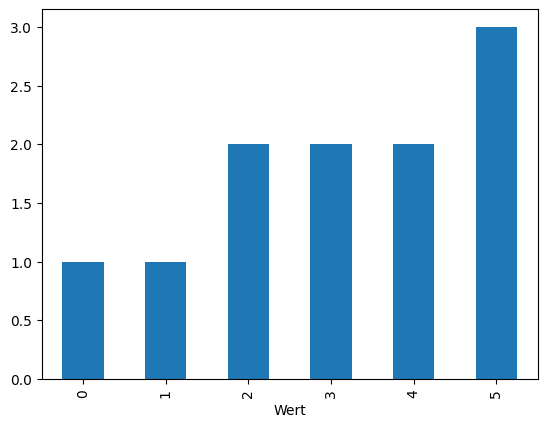

In [44]:
data = [5, 3, 2, 3, 4, 4, 5, 2, 1, 5, 0]

df = pd.DataFrame(data, columns=["Wert"])


df = df["Wert"].value_counts().sort_index()
display(df)

df.plot(kind="bar")


Erstelle in Pandas ein DataFrame mit den folgenden Werten in einer Spalte:
 
daten = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10]
 
Erstelle ein DataFrame, dass die Daten zunächst klassiert und dann die absoluten und relativen Häufigkeiten anzeigt:
 
Beispielausgabe:

Klasse	Absolute Häufigkeit	Relative Häufigkeit
(0, 3]	4	0.20
(3, 6)	8	0.40
(6, 9)	7	0.35
(9, 12)	1	0.05
 
Beachte, dass dieses Dataframe 2 Spalten hat und als Index die Klassen genutzt werden.
 
Nutze, um diese Aufgabe zu erfüllen pandas Funktionen (es werden keine for-schleifen benötigt)

In [45]:
daten = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10]
bins = [0, 3, 6, 9, 12]

series = pd.Series(daten)

classiefied_series = pd.cut(series, bins=bins, right=True)

abs_frequency = classiefied_series.value_counts()
rel_frequency = abs_frequency / len(series)

classified_df = pd.DataFrame({
    "Absolute Häufigkeit": abs_frequency,
    "Relative Häufigkeit": rel_frequency
})

display(classified_df)

,Absolute Häufigkeit,Relative Häufigkeit
"(3, 6]",8,0.40
"(6, 9]",7,0.35
"(0, 3]",4,0.20
"(9, 12]",1,0.05


Erstelle, für die letzte Aufgabe eine Funktion 'get_counts(ser, bins)', welche eine Series erwartet und das oben angegebene DataFrame zurückgibt. Schreibe hierfür Tests. (die Funktion get_counts kann bestenfalls noch mit anderen Parametern umgehen, um das zusammenspiel mit der cut-Funktion zu ermöglichen. Überlege, wie dies mit *args und **kwargs umgesetzt wird)

In [46]:
def get_counts(series, bins, **cut_kwargs):
    classiefied_series = pd.cut(series, bins=bins, **cut_kwargs)
    
    classified_df = pd.DataFrame({
    "Absolute Häufigkeit": classiefied_series.value_counts(),
    "Relative Häufigkeit": classiefied_series.value_counts(normalize=True)
    }).sort_index()
    
    return classified_df

get_counts(pd.Series([1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10]), [0, 3, 6, 9, 12], right=True)

,Absolute Häufigkeit,Relative Häufigkeit
"(0, 3]",4,0.20
"(3, 6]",8,0.40
"(6, 9]",7,0.35
"(9, 12]",1,0.05


# Wie kann man aus der Funktion 'get_counts' eine Methode der Klasse 'Series' machen, sodass direkt ser.get_counts() aufgerufen werden kann?

In [47]:
pd.Series.get_counts = get_counts

In [48]:
serie = pd.Series([1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 10])

serie.get_counts([0, 3, 6, 9, 12], right=True)

,Absolute Häufigkeit,Relative Häufigkeit
"(0, 3]",4,0.20
"(3, 6]",8,0.40
"(6, 9]",7,0.35
"(9, 12]",1,0.05


# Pandas Treppendiagram

In [49]:
import ast

data = "[127; 120; 133; 94; 133; 120; 133; 133; 113; 94; 230; 120; 230; 80; 113; 80; 120; 250; 133; 106]"
data = data.replace(";", ",")
data_list = ast.literal_eval(data)
data_series = pd.Series(data_list)

df = pd.DataFrame({
    "Absolute Häufigkeit": data_series.value_counts(),
    "Relative Häufigkeit": data_series.value_counts(normalize=True)
}).sort_index()

display(df)


,Absolute Häufigkeit,Relative Häufigkeit
80,2,0.10
94,2,0.10
106,1,0.05
113,2,0.10
120,4,0.20
127,1,0.05
133,5,0.25
230,2,0.10
250,1,0.05


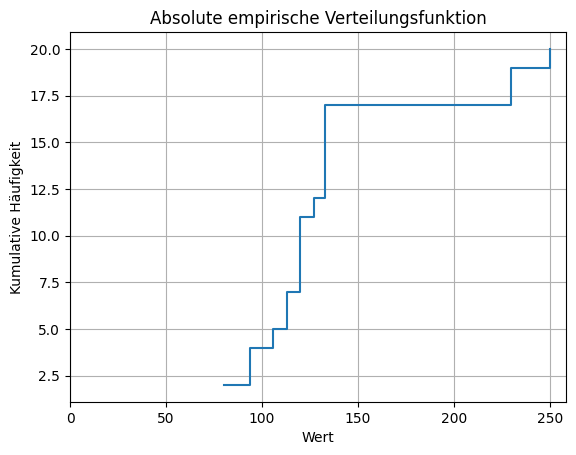

In [50]:
import matplotlib.pyplot as plt

# Gegebene Daten
data = "[127; 120; 133; 94; 133; 120; 133; 133; 113; 94; 230; 120; 230; 80; 113; 80; 120; 250; 133; 106]"
data = data.replace(";", ",")
data_list = ast.literal_eval(data)
data_series = pd.Series(data_list)

# Daten in DataFrame
df = pd.DataFrame(data_series, columns=["Wert"])

# Kumulative absolute Häufigkeiten berechnen
df["Kumulative Häufigkeit"] = df["Wert"].rank(method="max").astype(int)

# Entferne Duplikate für die AEVF
aevf_df = df.drop_duplicates(subset=["Wert"]).sort_values(by="Wert")

# Plot der AEVF
plt.step(aevf_df["Wert"], aevf_df["Kumulative Häufigkeit"], where="post")
plt.title("Absolute empirische Verteilungsfunktion")
plt.xlim(left=0)
plt.xlabel("Wert")
plt.ylabel("Kumulative Häufigkeit")
plt.grid()
plt.show()


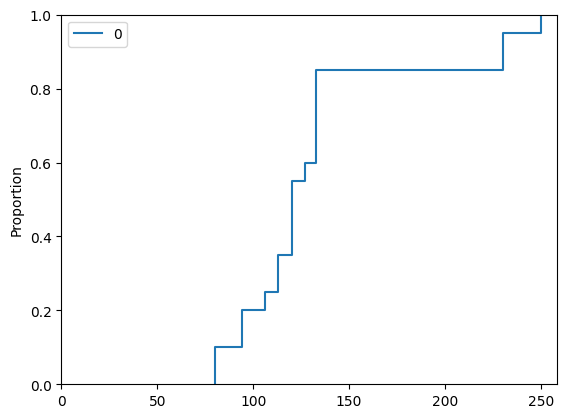

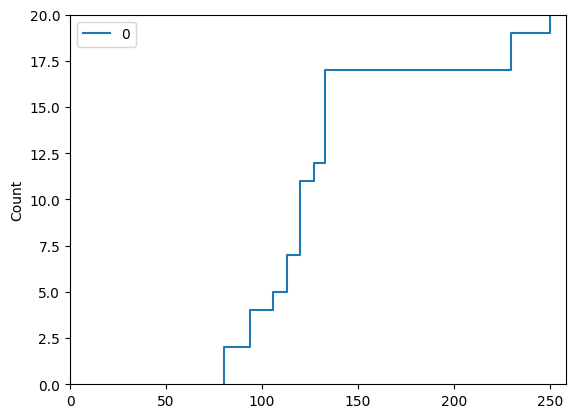

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame([127, 120, 133, 94, 133, 120, 133, 133, 113, 94, 230, 120, 230, 80, 113, 80, 120, 250, 133, 106])
sns.ecdfplot(data=df)
plt.xlim(left=0)
plt.show()
sns.ecdfplot(stat = "count", data=df)
plt.xlim(left=0)
plt.show()

# Modal-Wert

In [52]:
import numpy as np
def my_modus(liste):    
    if not liste:        
        return np.nan   
    return _my_modus(liste)

def _my_modus(liste):    
    frequency = {value: liste.count(value) for value in set(liste)}    
    return max(frequency, key=frequency.get)

In [53]:
def get_modal_value(data):
    if not data:
        raise ValueError("Cant calculate Modal value for empty array like sequence.")
    my_dict = {}
    for num in sorted(data):
        my_dict[num] = my_dict.get(num, 0) + 1

    max_val = max(my_dict.values())
    modal_val = [key for key, value in my_dict.items() if max_val == value]
    return modal_val

In [54]:
import unittest
from parameterized import parameterized

class TestModalValue(unittest.TestCase):
    
    @parameterized.expand([
        [[127, 120, 133, 94, 133, 120, 133, 133, 113, 94, 230, 120, 230, 80, 113, 80, 120, 250, 133, 106, 44, 44, 44, 44, 44], [44, 133]],
        [[1, 2, 3, 3, 3, 4, 5, 6, 6, 7], [3]],
        [[1, 1, 1, 2, 3, 4, 5, 5, 5, 5], [5]],
        [["pink", "silber", "pink"], ["pink"]],
        [["a", "b", "b", "a", "c", "a"], ["a"]],
        [["dog", "cat", "dog", "dog", "mouse", "cat"], ["dog"]]
    ])
    
    def test_modal_val_success(self, values, expected):
        self.assertEqual(get_modal_value(values), expected)
    
    def test_value_error(self):
        with self.assertRaises(ValueError) as context:
            get_modal_value([])
        self.assertEqual(str(context.exception), "Cant calculate Modal value for empty array like sequence.")
    
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

ModuleNotFoundError: No module named 'parameterized'

# Mean-Wert

In [28]:
def get_mean_value(data):
    if not data:
        raise ValueError("The input data is empty. Cannot calculate mean value.")

    if not isinstance(data, (list, tuple, set)):
        raise TypeError("Input data must be a list, tuple, or set.")

    if not all(isinstance(x, (int, float)) for x in data):
        raise ValueError("All elements in the input data must be numeric.")
    
    return sum(data) / len(data)

In [29]:
import unittest
from parameterized import parameterized

class TestMeanValue(unittest.TestCase):
    
    @parameterized.expand([
        [[1, 2, 3, 4, 5], 3.0],
        [[10, 10, 10, 10], 10.0],
        [[0], 0.0]
    ])
    def test_mean_value_success(self, values, expected):
        self.assertAlmostEqual(get_mean_value(values), expected)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            get_mean_value([])
        self.assertEqual(str(context.exception), "The input data is empty. Cannot calculate mean value.")
        
    def test_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            get_mean_value("string instead of list")
        self.assertEqual(str(context.exception), "Input data must be a list, tuple, or set.")
        
    def test_non_numeric_values(self):
        with self.assertRaises(ValueError) as context:
            get_mean_value([1, 2, "three", 4])
        self.assertEqual(str(context.exception), "All elements in the input data must be numeric.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

..............F......F
FAIL: test_p_quantil_1 (__main__.Test_p_quantil.test_p_quantil_1)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/2626224633.py", line 17, in test_p_quantil
    self.assertEqual(p_quantil(data_series, quantile_percantage), expected)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 4.5 != 3.5

FAIL: test_p_quantil_8 (__main__.Test_p_quantil.test_p_quantil_8)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/l

0 1
3 4
3 4
1 2
4 5
1 2
14 15


# Median-Wert

In [30]:
def get_median_value(data):
    if not data:
        raise ValueError("The input data is empty. Cannot calculate median value.")
    
    if not isinstance(data, (list, tuple, set)):
        raise TypeError("Input data must be a list, tuple, or set.")
    
    if not all(isinstance(x, (int, float)) for x in data):
        raise ValueError("All elements in the input data must be numeric.")

    data = sorted(data)
    n = len(data)
    
    if n % 2 != 0:
        return data[n // 2]
    else:
        return 0.5 * (data[(n // 2) - 1] + data[n // 2])

In [31]:
import unittest
from parameterized import parameterized

class TestMedianValue(unittest.TestCase):
    
    @parameterized.expand([
        [[1, 2, 3, 4, 5], 3],
        [[1, 2, 3, 4, 5, 6], 3.5],
        [[10], 10],
        [[2, 8, 4, 6], 5.0],
        [[0, 0, 0, 0], 0],
        [[-5, -10, -3], -5]
    ])
    def test_median_value_success(self, values, expected):
        self.assertEqual(get_median_value(values), expected)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            get_median_value([])
        self.assertEqual(str(context.exception), "The input data is empty. Cannot calculate median value.")

    def test_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            get_median_value("string instead of list")
        self.assertEqual(str(context.exception), "Input data must be a list, tuple, or set.")

    def test_non_numeric_values(self):
        with self.assertRaises(ValueError) as context:
            get_median_value([1, 2, "three", 4])
        self.assertEqual(str(context.exception), "All elements in the input data must be numeric.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.......................F......F
FAIL: test_p_quantil_1 (__main__.Test_p_quantil.test_p_quantil_1)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/2626224633.py", line 17, in test_p_quantil
    self.assertEqual(p_quantil(data_series, quantile_percantage), expected)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 4.5 != 3.5

FAIL: test_p_quantil_8 (__main__.Test_p_quantil.test_p_quantil_8)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Scienc

0 1
3 4
3 4
1 2
4 5
1 2
14 15


# Modal, Mean und Median in pandas

In [32]:
import pandas as pd

data = {'Wert': [127, 120, 133, 94, 133, 120, 133, 133, 113, 94, 230, 120, 230, 80, 113, 80, 120, 250, 133, 106]}
df = pd.DataFrame(data)

modal_value = df['Wert'].mode()[0]
mean_value = df['Wert'].mean()
median_value = df['Wert'].median()

# Ausgabe
print(f"Modalwert: {modal_value}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

Modalwert: 133
Mean: 133.1
Median: 120.0


# Varianz

In [33]:
def variance(data):
    if not isinstance(data, (list, tuple)):
        raise TypeError("Data must be a list or tuple of numbers.")
    if not data:
        raise ValueError("Cannot calculate variance of an empty dataset.")
    if not all(isinstance(num, (int, float)) for num in data):
        raise ValueError("All elements in the dataset must be numeric.")
    
    arithmetic_mean = sum(data) / len(data)
    return sum([(num - arithmetic_mean)**2 for num in data]) / len(data)

In [34]:
def standard_deviation(data):
    if not isinstance(data, (list, tuple)):
        raise TypeError("Data must be a list or tuple of numbers.")
    if not data:
        raise ValueError("Cannot calculate standard deviation of an empty dataset.")
    if not all(isinstance(num, (int, float)) for num in data):
        raise ValueError("All elements in the dataset must be numeric.")
    
    return variance(data)**0.5

In [35]:
import unittest
from parameterized import parameterized

class TestVariance(unittest.TestCase):
    
    @parameterized.expand([
        [[23, 16, 18, 17, 22, 28, 26, 22, 20, 8], 29],
        [[27, 22, 21, 26, 27, 35, 31, 24, 22, 15], 28],
        [[27, 27, 27], 0],
        [[10], 0]
    ])
    def test_variance_success(self, values, expected):
        self.assertEqual(variance(values), expected)
    
    @parameterized.expand([
        [[23, 16, 18, 17, 22, 28, 26, 22, 20, 8], 5.39],
        [[27, 22, 21, 26, 27, 35, 31, 24, 22, 15], 5.29],
        [[4, 4, 4], 0.0],
        [[10], 0]
    ])
    def test_standard_deviation_success(self, values, expected):
        self.assertAlmostEqual(standard_deviation(values), expected, delta=0.01)
    
    # Tests für Fehlerfälle
    def test_variance_empty_dataset(self):
        with self.assertRaises(ValueError) as context:
            variance([])
        self.assertEqual(str(context.exception), "Cannot calculate variance of an empty dataset.")
    
    def test_variance_non_numeric(self):
        with self.assertRaises(ValueError) as context:
            variance([1, "a", 3])
        self.assertEqual(str(context.exception), "All elements in the dataset must be numeric.")
    
    def test_variance_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            variance("not a list")
        self.assertEqual(str(context.exception), "Data must be a list or tuple of numbers.")
    
    def test_standard_deviation_empty_dataset(self):
        with self.assertRaises(ValueError) as context:
            standard_deviation([])
        self.assertEqual(str(context.exception), "Cannot calculate standard deviation of an empty dataset.")
    
    def test_standard_deviation_non_numeric(self):
        with self.assertRaises(ValueError) as context:
            standard_deviation([1, "a", 3])
        self.assertEqual(str(context.exception), "All elements in the dataset must be numeric.")
    
    def test_standard_deviation_invalid_type(self):
        with self.assertRaises(TypeError) as context:
            standard_deviation({"a": 1})
        self.assertEqual(str(context.exception), "Data must be a list or tuple of numbers.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.....................................F......F
FAIL: test_p_quantil_1 (__main__.Test_p_quantil.test_p_quantil_1)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/2626224633.py", line 17, in test_p_quantil
    self.assertEqual(p_quantil(data_series, quantile_percantage), expected)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 4.5 != 3.5

FAIL: test_p_quantil_8 (__main__.Test_p_quantil.test_p_quantil_8)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 

0 1
3 4
3 4
1 2
4 5
1 2
14 15


# Lineare Regression

In [36]:
import numpy as np

def linear_regression(data):
    if not isinstance(data, list):
        raise TypeError("Input data must be a list of tuples.")
    if len([x for x, y in data]) != len([y for x, y in data]):
        raise ValueError("The number of values for x and y must be the same.")
    if len(data) < 2:
        raise ValueError("At least two data points are required for linear regression.")
    if not all(isinstance(point, tuple) and len(point) == 2 for point in data):
        raise ValueError("Each element in the data list must be a tuple with exactly two numeric values.")
    if not all(isinstance(x, (int, float)) and isinstance(y, (int, float)) for x, y in data):
        raise ValueError("All elements in the tuples must be numeric values.")
    
    x_vals = [x[0] for x in data]
    y_vals = [y[1] for y in data]
    
    if len(set(x_vals)) == 1:
        raise ValueError("All x-values are the same. Linear regression is undefined.")
    
    x_mean, y_mean = np.mean(x_vals), np.mean(y_vals)
    nominator = sum((xi - x_mean) * (yi - y_mean) for xi, yi in data)
    denominator = sum((xi - x_mean) ** 2 for xi in x_vals)
    byx = nominator / denominator
    ayx = y_mean - byx * x_mean
    
    return ayx, byx

def calculate_y(data, value):
    if not isinstance(value, (int, float)):
        raise TypeError("The x-value must be a numeric value.")
    ayx, byx = linear_regression(data)
    return ayx + byx * value


In [37]:
class TestLinearRegression(unittest.TestCase):

    @parameterized.expand([
        [[(4, 50), (7, 80), (11, 70), (2, 45)], (41.68, 3.26)],
        [[(1, 2), (2, 4), (3, 6), (4, 8)], (0, 2)],
        [[(10, 20), (20, 40)], (0, 2)],
    ])
    def test_linear_regression_success(self, data, expected):
        ayx, byx = linear_regression(data)
        self.assertAlmostEqual(ayx, expected[0], delta=0.01)
        self.assertAlmostEqual(byx, expected[1], delta=0.01)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([])
        self.assertEqual(str(context.exception), "At least two data points are required for linear regression.")

    def test_one_data_point(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([(1, 2)])
        self.assertEqual(str(context.exception), "At least two data points are required for linear regression.")

    def test_same_x_values(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([(1, 2), (1, 3)])
        self.assertEqual(str(context.exception), "All x-values are the same. Linear regression is undefined.")

    def test_non_numeric_values(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([("a", 2), (3, 4)])
        self.assertEqual(str(context.exception), "All elements in the tuples must be numeric values.")

    def test_invalid_data_format(self):
        with self.assertRaises(ValueError) as context:
            linear_regression([(1, 2), [3, 4]])
        self.assertEqual(str(context.exception), "Each element in the data list must be a tuple with exactly two numeric values.")


class TestCalculateY(unittest.TestCase):

    @parameterized.expand([
        [[(1, 2), (2, 4)], 3, 6.0],
        [[(10, 20), (20, 40)], 15, 30.0],
        [[(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)], 6, 12.0],
        [[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)], 10, 10.0],
        [[(1, 1), (2, 3)], 1.5, 2.0],
        [[(1, 1), (2, 2), (3, 3)], -1, -1.0],
        [[(1, 1), (2, 2), (3, 3)], 0, 0.0],
    ])
    def test_calculate_y_success(self, test_list, value, expected):
        self.assertAlmostEqual(calculate_y(test_list, value), expected, delta=0.01)

    def test_empty_data(self):
        with self.assertRaises(ValueError) as context:
            calculate_y([], 5)
        self.assertEqual(str(context.exception), "At least two data points are required for linear regression.")

    def test_invalid_x_value(self):
        with self.assertRaises(TypeError) as context:
            calculate_y([(4, 50), (7, 80)], "five")
        self.assertEqual(str(context.exception), "The x-value must be a numeric value.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

......................................................F......F
FAIL: test_p_quantil_1 (__main__.Test_p_quantil.test_p_quantil_1)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/2626224633.py", line 17, in test_p_quantil
    self.assertEqual(p_quantil(data_series, quantile_percantage), expected)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 4.5 != 3.5

FAIL: test_p_quantil_8 (__main__.Test_p_quantil.test_p_quantil_8)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-Volksw

0 1
3 4
3 4
1 2
4 5
1 2
14 15


# Eindimensionale lineare Regression

In [38]:
import numpy as np
from unittest import TestCase, main
from parameterized import parameterized

def one_dimensional_regression(x, y):
    ones_x = np.vstack((
        np.ones(len(x)),  # Erste Zeile: Einsen
        x  # Zweite Zeile: Die unabhängige Variable
    ))

    return np.linalg.inv(ones_x @ ones_x.T) @ ones_x @ np.array(y).T



class TestDeviation(TestCase):
    @parameterized.expand([
        ([1, 2, 3], [1, 2, 3], 0, 1),  # no bias
        ([1, 2, 3], [2, 4, 6], 0, 2),  # no bias
        ([0, 1, 2], [3, 2, 1], 3, -1),  # negative
        ([0, 1, 2], [1, 2, 3], 1, 1),  # basic
        ([1, 2, 3], [3, 5, 7], 1, 2),  # basic
        ([0, 1, 2], [1, 1, 1], 1, 0),  # constant function
        ([1, 2, 3], [3, 3, 3], 3, 0),  # contant function
    ])
    def test_basic_lin_reg(self, x, y, a, b):
        result = one_dimensional_regression(x, y)
        self.assertAlmostEqual(float(result[0]), a)
        self.assertAlmostEqual(float(result[1]), b)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.............................................................F......F
FAIL: test_p_quantil_1 (__main__.Test_p_quantil.test_p_quantil_1)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/2626224633.py", line 17, in test_p_quantil
    self.assertEqual(p_quantil(data_series, quantile_percantage), expected)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 4.5 != 3.5

FAIL: test_p_quantil_8 (__main__.Test_p_quantil.test_p_quantil_8)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive

0 1
3 4
3 4
1 2
4 5
1 2
14 15


# Multiple lineare Regression

In [39]:
import numpy as np
from unittest import TestCase, main
from parameterized import parameterized

def multiple_regression(x, y):
    ones_x = np.vstack((
        np.ones(len(x[0])),
        x
    ))
    
    return np.linalg.inv(ones_x @ ones_x.T) @ ones_x @ np.array(y).T
    

class TestDeviation(TestCase):
    @parameterized.expand([
        ([[1], [2], [3]], [2, 4, 6], 0, 2),
    ])
    def test_basic_lin_reg(self, x, y, a, b):
        result = one_dimensional_regression(x, y)
        self.assertAlmostEqual(float(result[0]), a)
        self.assertAlmostEqual(float(result[1]), b)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.........E.............................................F......F
ERROR: test_basic_lin_reg_0 (__main__.TestDeviation.test_basic_lin_reg_0)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.venv/lib/python3.13/site-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/2264101851.py", line 19, in test_basic_lin_reg
    result = one_dimensional_regression(x, y)
  File "/var/folders/00/02tsycp12q53nd49sw0v4c_00000gq/T/ipykernel_46761/293602746.py", line 6, in one_dimensional_regression
    ones_x = np.vstack((
        np.ones(len(x)),  # Erste Zeile: Einsen
        x  # Zweite Zeile: Die unabhängige Variable
    ))
  File "/Users/vww3imy/Library/CloudStorage/OneDrive-VolkswagenAG/Fakultät 73/Data_Science/.v

0 1
3 4
3 4
1 2
4 5
1 2
14 15


In [40]:
def own_quantiles(parts, number_list):
    if not number_list:
        raise ValueError("Liste darf nicht leer sein.")
    if parts < 1:
        raise ValueError("Mind. ein Quantil.")
    
    sorted_number_list = sorted(number_list)
    n = len(sorted_number_list)
    
    quantiles = []
    
    for i in range(1, parts):
        p_quantil = i / parts
        pos = n * p_quantil - 1 # -1 weil Listen bei 0 starten
        if pos % 1 == 0:
            pos = int(pos + 1)
            quantiles.append(0.5*(number_list[pos]+ number_list[pos+1]))
        else:
            quantiles.append(number_list[int(pos+1)])
        
    return quantiles
        

print(own_quantiles(4, [1, 3, 7, 8, 9, 13, 15]))
print(own_quantiles(5, [0,1,2,3,4,5,6,7,8,9,10]))
print(own_quantiles(5, [0,1,2]))

[3, 8, 13]
[2, 4, 6, 8]
[0, 1, 1, 2]


# Zeitreihenanalyse

In [41]:
hourly_time = [num for num in range(0, 24)]
temperature = [6, 5, 5, 4, 4, 5, 7, 8, 9, 10, 12, 14, 16, 19, 21, 21, 20, 18, 16, 14, 12, 10, 8, 7]

time_row_temp_df = pd.DataFrame({"hourly_time": hourly_time, "temperature": temperature})

<Axes: xlabel='hourly_time', ylabel='temperature'>

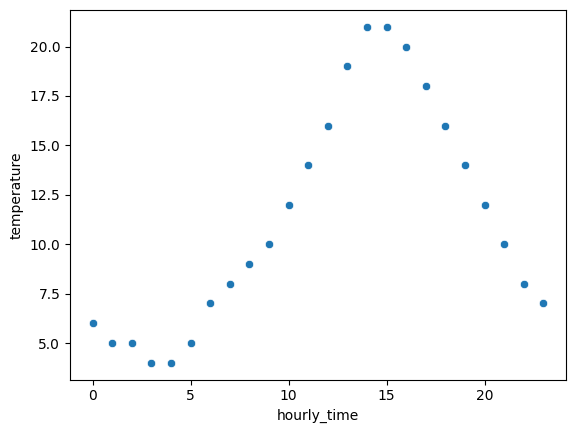

In [42]:
sns.scatterplot(time_row_temp_df, x="hourly_time", y="temperature")

<Axes: xlabel='hourly_time', ylabel='temperature'>

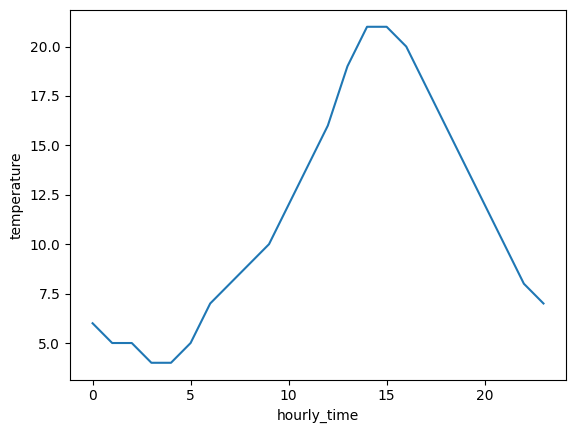

In [43]:
sns.lineplot(time_row_temp_df, x="hourly_time", y="temperature")

<Axes: xlabel='hourly_time', ylabel='temperature'>

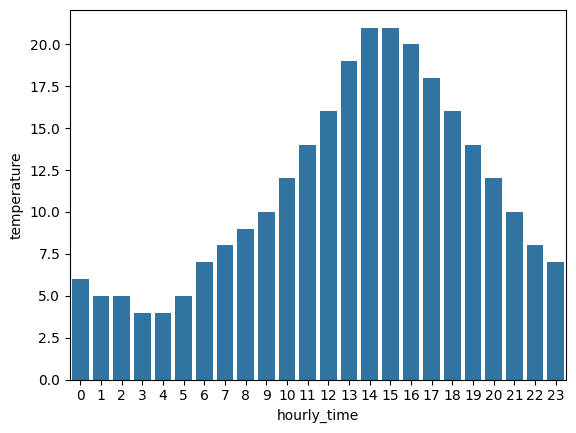

In [44]:
sns.barplot(time_row_temp_df, x="hourly_time", y="temperature")

# Regressionsrechnerische Zeitreihenmodellierung

<Axes: >

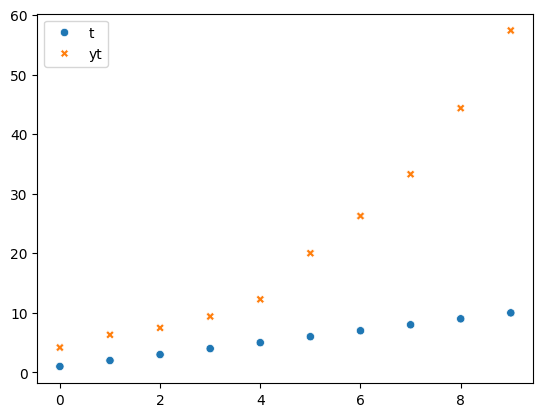

In [45]:
# Abonennten eines Streaminganbieters in Millionen über einen Zeitraum von 10 Jahren
yt = [4.179, 6.316, 7.479, 9.390, 12.268, 20.010, 26.253, 33.267, 44.350, 57.390]

df = pd.DataFrame({"t": range(1, len(yt) + 1), "yt":yt})

sns.scatterplot(df)

In [46]:
# Erkennbare überproportionalität = exponentieller Ansatz 
# y(t) = a*b^t
# um die Lineare Regression zu nutzen wird der Term mit dem logarhitmus linearisiert
# jetzt kann die Formel y = ln(a) + ln(b) * t genutzt werden 
# hierfür schreibe ich einfachhalber y_ = a_ +b_ * t 
# Nach der Anwendung der Linearen Regression werden die logarhitmierten Koeffizienten mit der e-Funktion zurückgerechnet
# Werte in Formel einsetzen

In [47]:
# ln y(t) = ln(a*b^t) = ln(a) + ln(b) * t
df["ln_y(t)"] = np.log(df["yt"]).round(3)
df["t_ln_y(t)"] = df["t"] * np.log(df["yt"]).round(3)
df["t^2"] = df["t"]**2
df

,t,yt,ln_y(t),t_ln_y(t),t^2
0,1,4.179,1.430,1.430,1
1,2,6.316,1.843,3.686,4
2,3,7.479,2.012,6.036,9
3,4,9.390,2.240,8.960,16
4,5,12.268,2.507,12.535,25
5,6,20.010,2.996,17.976,36
6,7,26.253,3.268,22.876,49
7,8,33.267,3.505,28.040,64
8,9,44.350,3.792,34.128,81
9,10,57.390,4.050,40.500,100


In [48]:
t_max = max(df["t"])
t_sum = sum(df["t"])
ln_yt = sum(df["ln_y(t)"])
t_ln_yt_ = sum(df["t_ln_y(t)"])
t_quad = sum(df["t^2"])

b_ = (t_max * t_ln_yt_ - t_sum * ln_yt) / (t_max * t_quad - t_sum**2)

a_ = (ln_yt - b_ * t_sum) / t_max

a = np.e**a_
b = np.e**b_

year_11 = a * b**11
year_11

df["lin_reg"] = a * b**df["t"]

display(df)

print(year_11)

,t,yt,ln_y(t),t_ln_y(t),t^2,lin_reg
0,1,4.179,1.430,1.430,1,4.254984
1,2,6.316,1.843,3.686,4,5.700659
2,3,7.479,2.012,6.036,9,7.637518
3,4,9.390,2.240,8.960,16,10.232446
4,5,12.268,2.507,12.535,25,13.709027
5,6,20.010,2.996,17.976,36,18.366814
6,7,26.253,3.268,22.876,49,24.607133
7,8,33.267,3.505,28.040,64,32.967666
8,9,44.350,3.792,34.128,81,44.168779
9,10,57.390,4.050,40.500,100,59.175588


79.28111864696902


In [49]:
from scipy.stats import linregress

# Daten
yt = [4.179, 6.316, 7.479, 9.390, 12.268, 20.010, 26.253, 33.267, 44.350, 57.390]
df = pd.DataFrame({"t": range(1, len(yt) + 1), "yt": yt})

# Logarithmische Transformation
df["ln_yt"] = np.log(df["yt"])

# Lineare Regression mit scipy
slope, intercept, _, _, _ = linregress(df["t"], df["ln_yt"])

# Koeffizienten berechnen
a = np.exp(intercept)  # a = exp(intercept)
b = np.exp(slope)      # b = exp(slope)

# Lineare Regression berechnen
df["lin_reg"] = (a * b**df["t"]).round(3)

# Schätzung für Jahr 11
year_11 = round(a * b**11, 3)

# Ergebnisse anzeigen
print(f"a = {a:.3f}, b = {b:.3f}, Schätzung für Jahr 11 = {year_11:.3f}")
print("\nDataFrame mit Werten:")
print(df)


a = 3.176, b = 1.340, Schätzung für Jahr 11 = 79.267

DataFrame mit Werten:
    t      yt     ln_yt  lin_reg
0   1   4.179  1.430072    4.255
1   2   6.316  1.843086    5.701
2   3   7.479  2.012099    7.638
3   4   9.390  2.239645   10.232
4   5  12.268  2.506994   13.708
5   6  20.010  2.996232   18.366
6   7  26.253  3.267780   24.605
7   8  33.267  3.504566   32.964
8   9  44.350  3.792113   44.163
9  10  57.390  4.049870   59.166


In [50]:
from sklearn.linear_model import LinearRegression

# Daten
yt = [4.179, 6.316, 7.479, 9.390, 12.268, 20.010, 26.253, 33.267, 44.350, 57.390]
df = pd.DataFrame({"t": range(1, len(yt) + 1), "yt": yt})

# Logarithmische Transformation
df["ln_yt"] = np.log(df["yt"])

# Feature und Target definieren
X = df["t"].values.reshape(-1, 1)  # t als Feature (2D-Array für scikit-learn)
y = df["ln_yt"].values            # ln(yt) als Zielvariable

# Lineares Regressionsmodell trainieren
model = LinearRegression()
model.fit(X, y)

# Koeffizienten berechnen
slope = model.coef_[0]  # Steigung
intercept = model.intercept_  # Achsenabschnitt
a = np.exp(intercept)  # a = exp(intercept)
b = np.exp(slope)      # b = exp(slope)

# Vorhersage für Jahr 11
t_11 = np.array([[11]])  # Jahr 11 als Eingabe
ln_y11_pred = model.predict(t_11)  # Vorhersage von ln(y(11))
y11_pred = np.exp(ln_y11_pred)     # Rücktransformation zu y(11)

# Lineare Regressionsergebnisse hinzufügen
df["lin_reg"] = np.exp(model.predict(X)).round(3)

# Ergebnisse anzeigen
print(f"a = {a:.3f}, b = {b:.3f}, Schätzung für Jahr 11 = {y11_pred[0]:.3f}")
print("\nDataFrame mit Werten:")
print(df)


a = 3.176, b = 1.340, Schätzung für Jahr 11 = 79.267

DataFrame mit Werten:
    t      yt     ln_yt  lin_reg
0   1   4.179  1.430072    4.255
1   2   6.316  1.843086    5.701
2   3   7.479  2.012099    7.638
3   4   9.390  2.239645   10.232
4   5  12.268  2.506994   13.708
5   6  20.010  2.996232   18.366
6   7  26.253  3.267780   24.605
7   8  33.267  3.504566   32.964
8   9  44.350  3.792113   44.163
9  10  57.390  4.049870   59.166


# Schätzung Siedler Würfel wahrscheinlichkeit der Ereignisse
Die Zahlen in der Mitte werden durch die häufigsten Kombinationen am wahrscheinlichsten gewürfelt.

# Händische Rechnung
2: Anzahl der Kombinationen  = 1 (1,1)
3: Anzahl der Kombinationen  = 2 (1,2), (2,1)
4: Anzahl der Kombinationen  = 3 (1,3), (2,2), (3,1)
5: Anzahl der Kombinationen  = 4 usw. 
6: Anzahl der Kombinationen  = 5 
7: Anzahl der Kombinationen  = 6
8: Anzahl der Kombinationen  = 5
9: Anzahl der Kombinationen  = 4
10: Anzahl der Kombinationen = 3
11: Anzahl der Kombinationen = 2
12: Anzahl der Kombinationen = 1

P(Anzahl der Kombinationen) = Anzahl der Kombinationen / Anzahl der Ergebnisse

z.B. für die Zahl 2

P(2) = 1 / 36
P(3) = 2 / 36 = 1/18
P(4) = 3 / 36 = 1/12
P(5) = 4 / 36 = 1/9
usw.

# Siedler von Catan Würfelergebnis wahrscheinlichkeit

In [51]:
from random import randint

def get_posibilities(tosses, cube_1=(1, 6), cube_2=(1, 6)):
    frequency = {}
    for _ in range(tosses):
        res = randint(cube_1[0], cube_1[1]) + randint(cube_2[0], cube_2[1])
        frequency[res] = frequency.get(res, 0) + 1
            
    sorted_frequency = dict(sorted(frequency.items()))
    
    relative_frequency = {key: value / tosses for key, value in sorted_frequency.items()}
     
    return relative_frequency

print(get_posibilities(100, (1, 6), (1, 4)))

{2: 0.02, 3: 0.08, 4: 0.13, 5: 0.15, 6: 0.15, 7: 0.19, 8: 0.14, 9: 0.05, 10: 0.09}


# Monty Hall Simulation

In [52]:
import random

def monty_hall_simulation(num_simulations, switch=True):
    win_count = 0

    for _ in range(num_simulations):
        doors = [0, 1, 2]
        winning_door = random.choice(doors)
        player_choice = random.choice(doors)

        doors_to_open = [door for door in doors if door != winning_door and door != player_choice]
        door_opened = random.choice(doors_to_open)

        if switch:
            remaining_door = [door for door in doors if door != player_choice and door != door_opened][0]
            player_choice = remaining_door
            
        if player_choice == winning_door:
            win_count += 1

    return win_count

simulations = 100000

print(monty_hall_simulation(simulations, switch=False)/simulations)

print(monty_hall_simulation(simulations, switch=True)/simulations)

0.33677
0.66559


# Boxplots

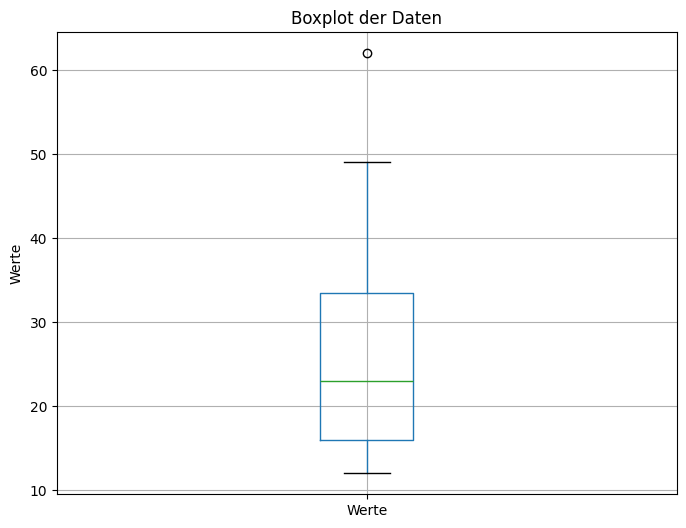

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

my_l = [15, 21, 62, 33, 23, 40, 30, 40, 48, 23, 25, 23, 24, 18, 17, 18, 
        15, 16, 19, 14, 15, 19, 24, 39, 43, 15, 35, 49, 23, 12, 16, 15]

df = pd.DataFrame(my_l, columns=["Werte"])

plt.figure(figsize=(8, 6))
df.boxplot(column=["Werte"])
plt.title("Boxplot der Daten")
plt.ylabel("Werte")
plt.grid(True)
plt.show()

In [1]:
def p_quantil(data_series, quantile_percantage):
    if len(data_series) == 0:
        raise ValueError("Die Datenserie darf nicht leer sein.")
    if not isinstance(quantile_percantage, (int, float)) or not (0 <= quantile_percantage <= 1):
        raise ValueError("Der Quantil-Prozentsatz muss eine Zahl zwischen 0 und 1 sein.")
        
    sorted_data = sorted(data_series)
    
    if quantile_percantage == 0:
        return sorted_data[0]
    elif quantile_percantage == 1:
        return sorted_data[-1]
    
    quantile_index = (len(sorted_data) - 1) * quantile_percantage
    lower_index = int(quantile_index)
    upper_index = lower_index + 1
    print(lower_index, upper_index)
    
    if len(sorted_data) % 2 !=0:
        return sorted_data[lower_index]
    else:
        return (sorted_data[lower_index] + sorted_data[upper_index]) / 2

In [2]:
from parameterized import parameterized
import unittest
class Test_p_quantil(unittest.TestCase):

    @parameterized.expand([
        ([1], 0.5, 1),
        ([1, 2, 3, 4, 5, 6], 0.5, 3.5),
        ([1, 2, 3, 4, 5, 6], 1, 6),
        ([1, 2, 3, 4, 5, 6], 0, 1),
        ([1, 2, 3, 4, 5, 6, 7], 0.5, 4),
        ([1, 2, 3, 4, 5, 6], 0.3, 2.5),
        ([1, 2, 3, 4, 5, 6, 7], 0.7, 5),
        ([10, 30, 20, 40, 50], 0.25, 20),
        ([15, 21, 62, 33, 23, 40, 30, 40, 48, 23, 25, 23, 24, 18, 17, 18, 15, 16, 19, 14, 15, 19, 24, 39, 43, 15, 35, 49, 23, 12, 16, 15], 0.45, 20)
    ])
    def test_p_quantil(self, data_series, quantile_percantage, expected):
        self.assertEqual(p_quantil(data_series, quantile_percantage), expected)

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.004s

OK


0 1
2 3
3 4
1 2
4 5
1 2
13 14


## Aufgaben

In [3]:
def calculate_statistics(data):
    sorted_data = sorted(data)

    minimum = sorted_data[0]
    maximum = sorted_data[-1]

    n = len(sorted_data)
    q1_index = n * 0.25
    q3_index = n * 0.75
    
    q1_lower = int(q1_index)
    q1_upper = q1_lower + 1
    
    q3_lower = int(q3_index)
    q3_upper = q3_lower + 1
    
    if n % 2 == 0:
        median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
        q1 = (sorted_data[q1_lower] + sorted_data[q1_upper]) / 2
        q3 = (sorted_data[q3_lower] + sorted_data[q3_upper]) / 2
    else:
        median = sorted_data[n // 2]
        q1 = sorted_data[q1_lower]
        q3 = sorted_data[q3_lower]

    range_width = maximum - minimum
    
    return {
        "Minimum": minimum,
        "1. Quartil (Q1)": q1,
        "Median": median,
        "3. Quartil (Q3)": q3,
        "Maximum": maximum,
        "Spannweite": range_width
    }

Methode 1:
77,77,78,79,79,81,81,82,82,85,85,85,86,86,86,87,87,87,90
Methode 2:
66,66,66,67,68,70,72,75,75,78,83,86,88,89,90,93,94,95,98

In [5]:
import seaborn as sns
import plotly.express as px

method_1 = [77,77,78,79,79,81,81,82,82,85,85,85,86,86,86,87,87,87,90]
method_2 = [66,66,66,67,68,70,72,75,75,78,83,86,88,89,90,93,94,95,98]

print(calculate_statistics(method_1))
print(calculate_statistics(method_2))

{'Minimum': 77, '1. Quartil (Q1)': 79, 'Median': 85, '3. Quartil (Q3)': 86, 'Maximum': 90, 'Spannweite': 13}
{'Minimum': 66, '1. Quartil (Q1)': 68, 'Median': 78, '3. Quartil (Q3)': 90, 'Maximum': 98, 'Spannweite': 32}


<Axes: >

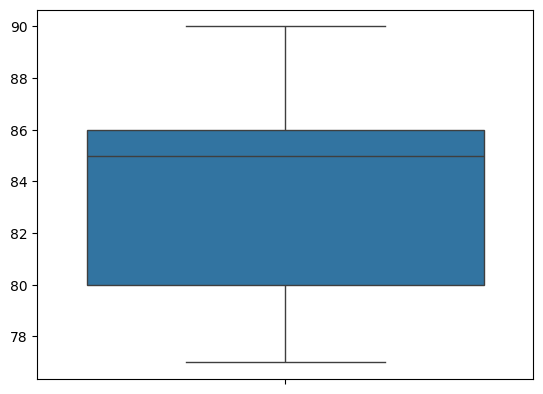

In [59]:
sns.boxplot(method_1)

In [60]:
px.box(method_2)

3,10,21,23,25,26,29,35,36,38,45,53,72
1,5,6,5,3,3,4,3,4,2,1,2,1

In [14]:
import pandas as pd
umsaetze = [3,10,21,23,25,26,29,35,36,38,45,53,72]
vertreter = [1,5,6,5,3,3,4,3,4,2,1,2,1]

df = pd.DataFrame({
    "umsaetze": umsaetze,
    "vertreter": vertreter
})

df["vertreter_kummuliert"] = df["vertreter"].cumsum()

df

,umsaetze,vertreter,vertreter_kummuliert
0,3,1,1
1,10,5,6
2,21,6,12
3,23,5,17
4,25,3,20
5,26,3,23
6,29,4,27
7,35,3,30
8,36,4,34
9,38,2,36


In [16]:
q1_val = sum(df["vertreter"]/4)
q1 = df[df["vertreter_kummuliert"] >= q1_val]
q1

,umsaetze,vertreter,vertreter_kummuliert
2,21,6,12
3,23,5,17
4,25,3,20
5,26,3,23
6,29,4,27
7,35,3,30
8,36,4,34
9,38,2,36
10,45,1,37
11,53,2,39


In [42]:
umsatz= [3,10,21,23,25,26,29,35,36,38,45,53,72]
anzahl=  [1,5,6,5,3,3,4,3,4,2,1,2,1]

               0
count  40.000000
mean   27.775000
std    13.187966
min     3.000000
25%    21.000000
50%    25.500000
75%    35.250000
max    72.000000
0    14.25
dtype: float64


In [31]:
px.box(pd.Series(umsaetze))

In [57]:
umsatz = [3, 10, 21, 23, 25, 26, 29, 35, 36, 38, 45, 53, 72]
anzahl = [1, 5, 6, 5, 3, 3, 4, 3, 4, 2, 1, 2, 1]

expanded_data = []
for value, freq in zip(umsatz, anzahl):
    expanded_data.extend([value] * freq)

expanded_data = pd.Series(expanded_data)

q1 = expanded_data.quantile(0.25)
meadian_val = expanded_data.median()
q3 = expanded_data.quantile(0.75)
    
iQr = q3 - q1

lower_whisker = q1 - iQr * 1.5
upper_whisker = q3 + iQr * 1.5

print({
    "Q1 (Unteres Quartil)": q1,
    "Q2 (Median)": meadian_val,
    "Q3 (Oberes Quartil)": q3,
    "IQR (Interquartilsabstand)": iQr,
    "Untere Whisker-Grenze": lower_whisker,
    "Obere Whisker-Grenze": upper_whisker
})
    
px.box(expanded_data)

{'Q1 (Unteres Quartil)': np.float64(21.0), 'Q2 (Median)': np.float64(25.5), 'Q3 (Oberes Quartil)': np.float64(35.25), 'IQR (Interquartilsabstand)': np.float64(14.25), 'Untere Whisker-Grenze': np.float64(-0.375), 'Obere Whisker-Grenze': np.float64(56.625)}


### Vektor normieren

In [14]:
def norm(v):
    return (sum(num**2 for num in v))**0.5

norm((9, 9))

12.727922061357855

In [6]:
import unittest
from parameterized import parameterized

class TestNormFunction(unittest.TestCase):
    
    @parameterized.expand([
        ((3,4), 5.0),
        ((0,0), 0.0),
        ((-1, -1, -1), (3)**0.5) 
    ])
    
    def test_norm(self, vector, expected):
        self.assertAlmostEqual(norm(vector), expected, places=2)
        
if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_norm_0 (__main__.TestNormFunction.test_norm_0) ... ok
test_norm_1 (__main__.TestNormFunction.test_norm_1) ... ok
test_norm_2 (__main__.TestNormFunction.test_norm_2) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


In [8]:
def normalize(v):
    div = norm(v)
    return [num/div for num in v]

normalize((2,2,2))

[0.5773502691896258, 0.5773502691896258, 0.5773502691896258]

In [9]:
def perpendicular(v, w):
    vt_x_w = sum(v*w for v,w in zip(v,w))
    if vt_x_w == 0:
        return [f"The two vectors {v}, {w} are perpendicular.", vt_x_w]
    else:
        return [f"The two vectors {v}, {w} are NOT perpendicular.", vt_x_w]

perpendicular((2,-1, 0), (1,2,-2))

['The two vectors (2, -1, 0), (1, 2, -2) are perpendicular.', 0]

In [10]:
def projection_factor(v, w):
    return perpendicular(v, w)[1] / (norm(v)**2)

projection_factor((3,4), (1,0))

0.12

In [35]:
def projection_parallel_component(v, w):
    factor = projection_factor(v, w)
    return [factor*num for num in v]


projection_parallel_component((3,4), (1,0))

[0.36, 0.48]

In [36]:
import numpy as np

def projection_level_component(n, w):
    proj_w_n = w - projection_factor(n, w) * n
    return proj_w_n

projection_level_component(np.array([3,4]), np.array([1,0]))

array([ 0.64, -0.48])

In [23]:
class TestVectorOperations(unittest.TestCase):

    @parameterized.expand([
        ((3, 4), 5.0),
        ((0, 0), 0.0),
        ((-1, -1, -1), (3)**0.5)
    ])
    def test_norm(self, vector, expected):
        self.assertAlmostEqual(norm(vector), expected, places=5)
    
    @parameterized.expand([
        ((3, 4), [3/5, 4/5]),
        ((1, 0), [1.0, 0.0]),
        ((0, 5), [0.0, 1.0])
    ])
    def test_normalize(self, vector, expected):
        result = normalize(vector)
        for a, b in zip(result, expected):
            self.assertAlmostEqual(a, b, places=5)
    
    @parameterized.expand([
        (((1, 0), (0, 1)), 0),
        (((3, 4), (1, 2)), 11)
    ])
    def test_perpendicular(self, vectors, expected_dot):
        v, w = vectors
        message, dot = perpendicular(v, w)
        self.assertEqual(dot, expected_dot)
        if expected_dot == 0:
            self.assertIn("perpendicular", message)
        else:
            self.assertIn("NOT perpendicular", message)
    
    @parameterized.expand([
        (((3, 4), (1, 0)), 3/(5**2)),
        (((3, 4), (1, 2)), 11/(5**2))
    ])
    def test_projection_factor(self, vectors, expected_factor):
        v, w = vectors
        self.assertAlmostEqual(projection_factor(v, w), expected_factor, places=5)
        
if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_norm_0 (__main__.TestNormFunction.test_norm_0) ... ok
test_norm_1 (__main__.TestNormFunction.test_norm_1) ... ok
test_norm_2 (__main__.TestNormFunction.test_norm_2) ... ok
test_norm_0 (__main__.TestVectorOperations.test_norm_0) ... ok
test_norm_1 (__main__.TestVectorOperations.test_norm_1) ... ok
test_norm_2 (__main__.TestVectorOperations.test_norm_2) ... ok
test_normalize_0 (__main__.TestVectorOperations.test_normalize_0) ... ok
test_normalize_1 (__main__.TestVectorOperations.test_normalize_1) ... ok
test_normalize_2 (__main__.TestVectorOperations.test_normalize_2) ... ok
test_perpendicular_0 (__main__.TestVectorOperations.test_perpendicular_0) ... ok
test_perpendicular_1 (__main__.TestVectorOperations.test_perpendicular_1) ... ok
test_projection_factor_0 (__main__.TestVectorOperations.test_projection_factor_0) ... ok
test_projection_factor_1 (__main__.TestVectorOperations.test_projection_factor_1) ... ok

----------------------------------------------------------------------
Ran

## Kovarianz

In [9]:
x1 = [2,4,2,7,1,1,2,1,4,6]
x2 = [7,8,6,6,5,4,6,8,6,4]
x3 = [2,6,1,3,9,6,8,3,7,5]

In [10]:
def covariance(arr1, arr2):
    print(arr1, arr2)
    arr1_mean = sum(arr1)/len(arr1)
    arr2_mean = sum(arr2)/len(arr2)
    return 1/len(arr1) * (sum((arr1_i - arr1_mean)*(arr2_i - arr2_mean) for arr1_i, arr2_i in zip(arr1, arr2)))
    
covariance([2,4,2,7,1,1,2,1,4,6], [7,8,6,6,5,4,6,8,6,4])

-0.30000000000000004

In [16]:
def covariance_matrix(*arrays):
    num_arrays = len(arrays)
    cov_matrix = np.zeros((num_arrays, num_arrays))
    for i in range(num_arrays):
        for j in range(num_arrays):
            cov_value = covariance(arrays[i], arrays[j])
            cov_matrix[i][j] = cov_value
    
    return cov_matrix
        
        
covariance_matrix(x1, x2, x3)

array([[ 4.2, -0.3, -0.7],
       [-0.3,  1.8, -1.1],
       [-0.7, -1.1,  6.4]])

## Geschlossene Covarianzmatrix

In [24]:
import numpy as np

# Gegebene Datenmatrix
x = np.array([[2, 7, 2],
              [4, 8, 6],
              [2, 6, 1],
              [7, 6, 3],
              [1, 5, 9],
              [1, 4, 6],
              [2, 6, 8],
              [1, 8, 3],
              [4, 6, 7],
              [6, 4, 5]])

x_mean = np.mean(x, axis=0)

x_centered = x - x_mean

cov_mat_closed = (x_centered.T @ x_centered) / len(x)
print(cov_mat_closed)


[[ 4.2 -0.3 -0.7]
 [-0.3  1.8 -1.1]
 [-0.7 -1.1  6.4]]


### Projizieren

In [37]:
import simpy as sp

x = np.array([[2, 7, 2],
              [4, 8, 6],
              [2, 6, 1],
              [7, 6, 3],
              [1, 5, 9],
              [1, 4, 6],
              [2, 6, 8],
              [1, 8, 3],
              [4, 6, 7],
              [6, 4, 5]])

v1 = np.array([1, 0, 0])
v2 = np.array([2, 0, 0])
v3 = np.array([1, -2, 0.5])

def proj_factor(v, w):
    return w.T @ v / (v.T @ v)

proj_factor(np.array([1,0]), np.array([2,3]))

ModuleNotFoundError: No module named 'simpy'

## Full PCA 


In [29]:
import numpy as np

# Gegebene Matrix x
x = np.array([[1, 1, 0],
              [2, 3, 1],
              [4, 4, -1],
              [1, 4, 0]])

x_mean = np.mean(x, axis=0)

x_centered = x-x_mean

cov_matrix = (x_centered.T @ x_centered) / len(x_centered)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indicies = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indicies]
eigenvectors = eigenvectors[:, sorted_indicies]

pca_matrix = x_centered @ eigenvectors
print(pca_matrix)

[[ 2.02027019 -0.91840258 -0.27394352]
 [ 0.27129904  0.32674839  0.90533548]
 [-2.33268629 -0.73403206 -0.1406116 ]
 [ 0.04111706  1.32568625 -0.49078035]]


In [35]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CustomPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components):
        self.n_components = n_components  # Anzahl der Hauptkomponenten
        
    def fit(self, X, y=None):
        """
        Berechnet die Eigenwerte und Eigenvektoren der Kovarianzmatrix.
        """
        # Mittelwert der Spalten berechnen
        self.mean = np.mean(X, axis=0)

        # Daten zentrieren
        X_centered = X - self.mean

        # Kovarianzmatrix berechnen
        cov_matrix = (X_centered.T @ X_centered) / len(X_centered)

        # Eigenwerte und Eigenvektoren berechnen
        self.eigenvalues, self.eigenvectors = np.linalg.eig(cov_matrix)

        # Eigenwerte und zugehörige Eigenvektoren sortieren (absteigend nach Varianz)
        sorted_indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_indices]
        self.eigenvectors = self.eigenvectors[:, sorted_indices]

        # Wähle die ersten n_components Hauptkomponenten
        self.components_ = self.eigenvectors[:, :self.n_components]

        return self
        
    def transform(self, X, y=None):
        """
        Transformiert die Daten in den neuen Raum der Hauptkomponenten.
        """
        # Zentriere die neuen Daten
        X_centered = X - self.mean

        # Projektion auf die Hauptkomponenten
        return X_centered @ self.components_

    def fit_transform(self, X, y=None):
        """
        Kombiniert fit() und transform().
        """
        return self.fit(X).transform(X)


In [36]:
# Beispiel-Datenmatrix
X = np.array([[1, 1, 0],
              [2, 3, 1],
              [4, 4, -1],
              [1, 4, 0]])

# PCA-Instanz mit 2 Hauptkomponenten
pca = CustomPCA(n_components=2)

# PCA an den Daten anpassen und transformieren
X_transformed = pca.fit_transform(X)

# Ergebnisse ausgeben
print("Eigenwerte:")
print(pca.eigenvalues)

print("\nEigenvektoren:")
print(pca.eigenvectors)

print("\nTransformierte Daten:")
print(X_transformed)

Eigenwerte:
[2.39955269 0.81161873 0.28882859]

Eigenvektoren:
[[-0.70083477 -0.57765664  0.41850141]
 [-0.65971771  0.74802961 -0.07227894]
 [ 0.27129904  0.32674839  0.90533548]]

Transformierte Daten:
[[ 2.02027019 -0.91840258]
 [ 0.27129904  0.32674839]
 [-2.33268629 -0.73403206]
 [ 0.04111706  1.32568625]]


### MyKmeans algo

KlasseMyKMeans (leitet ab von BaseEstimator, ClusterMixin (warum?))
- __init__ hat Parameter
- n_clusters (Anzahl der Cluster),
- max_iter=300 (Maximale Anzahl der Durchläufe)
- tol= 0.0001 (Wenn sich zwischen zwei Epochen die Inertia nur um tol ändert, ist die Epoche beendet)
- init=`random` (`random`: die Centroiden werden zufällig gesetzt, nd-Array:Startcentroiden sind angegeben)
- random_state=None(seed für alle Randomzahlen)
- max_epochs=None (Maximale Anzahl von Epochen)
- dist=euclid_squared (Abstandsmaß, mit dem der Abstand zweier Datenpunkte gemessen wird)
- Methode fit(self, X, y=None)
- Methodepredict(self, X)
- Attributes:cluster_centers_, labels_, inertia_
Baue einen Visualisierer, der den Ablauf von Kmeans darstellt.

In [2]:
from sklearn.base import BaseEstimator, ClusterMixin
import numpy as np
# BaseEstimator stellt grundlegende Funktionlitäten bereit, die "Estimators" beinhalten sollen, Kompatible und ein heitlich
# fit, predict, set_params, get_params

# ClusterMixin spezuiell für Clustering Algorhitmen, stellt sicher dass das Modell eine fit_predict(x) methode besitzt

In [61]:
class MyKmeans(BaseEstimator, ClusterMixin):
    
    def __init__(self, n_clusters=2, max_iter=300, tol=0.0001, init="random", random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.init = init
        self.random_state = random_state
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
    def euclid_distance(self, a, b):
        return np.sum((a-b)**2)
    
    def calculate_centroid_matching(self, X, c):
        distances = np.linalg.norm(X[:, np.newaxis] - c, axis=2)
        return np.argmin(distances, axis=1)
        
    def calculate_centroids(self, X, labels):
        pass
    
    def calculate_min_max_for_each_column(self, array):
        return np.min(array, axis=0), np.max(array, axis=0)
    
    def _initialize_centroids(self, X):
        if isinstance(self.init, np.ndarray):
            self.cluster_centers_ = self.init
        else:
            X_min, X_max = self.calculate_min_max_for_each_column(X)
            rand_factor = np.random.rand(self.n_clusters, X.shape[1])
            self.cluster_centers_ =  X_min + rand_factor * (X_max - X_min)
    
    def fit(self, X, y=None):
        self._initialize_centroids(X)
        
        for _ in range(self.max_iter):
            labels = self.calculate_centroid_matching(X, self.cluster_centers_)
            
            new_centroids = np.array([
                X[labels == i].mean(axis=0) if np.any(labels == i) else self.cluster_centers_[i] 
                for i in range(self.n_clusters)
            ])
            
            shift = self.euclid_distance(new_centroids, self.cluster_centers_)
            
            if shift < self.tol:
                break
            
            self.cluster_centers_ = new_centroids
            
        self.labels_ = labels
        self.inertia_ = self.euclid_distance(X, self.cluster_centers_[self.labels_])
        
        return self
    
    def predict(self, X):
        return self.calculate_centroid_matching(X, self.cluster_centers_)

In [64]:
X = np.array([[1, 2], [2, 3], [3, 9], [3, 8]])

kmeans = MyKmeans(n_clusters=2, random_state=42)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 0, 0])